In [1]:
import os, json
import pandas as pd
import numpy as np

path_to_json = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/37'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files) 

['90.json', '4.json', '42.json']


In [2]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/37/'
for file in json_files:
    print(filepath + file)

/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/37/90.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/37/4.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/37/42.json


In [3]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/37/'

match_list=[]

for file in json_files:
    df_matches=pd.read_json(filepath + file)
    match_list.extend(df_matches['match_id'].values)

In [4]:
print(match_list)

[3775648, 3775609, 3775633, 3775570, 3775581, 3775579, 3775544, 3775622, 3775553, 3775584, 3775618, 3775641, 3775636, 3775653, 3775654, 3775643, 3764237, 3775594, 3775560, 3775624, 3764240, 3764233, 3775585, 3775593, 3775602, 3775620, 3764232, 3775559, 3775606, 3775567, 3775638, 3775607, 3764230, 3764241, 3764235, 3764239, 3764236, 3764231, 3764234, 3775543, 3775551, 3775540, 3775550, 3775545, 3775556, 3775575, 3775562, 3775561, 3775582, 3775558, 3775552, 3775557, 3775564, 3775569, 3775548, 3775568, 3775563, 3775555, 3775549, 3775572, 3775577, 3775541, 3775588, 3775586, 3775592, 3775580, 3775591, 3775590, 3775571, 3775589, 3775578, 3775596, 3775576, 3775574, 3775573, 3775597, 3775611, 3775628, 3775612, 3775627, 3775644, 3775637, 3775631, 3775621, 3775615, 3775610, 3775616, 3775632, 3775629, 3775619, 3775600, 3775605, 3775626, 3775614, 3775603, 3775625, 3775613, 3775598, 3775601, 3775630, 3775651, 3775635, 3775650, 3775647, 3775659, 3775657, 3775649, 3775645, 3775639, 3775642, 3775646, 

In [5]:
def dict_to_dataframe(a):
    dataframe = df_match[a].apply(pd.Series)
    dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
    return dataframe 

filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/37/'

appended_data = []

for file in json_files:
    df_match = pd.read_json(filepath + file)
    
    df_home_team = dict_to_dataframe("home_team")
    df_away_team = dict_to_dataframe("away_team")

    frames = [df_match, df_home_team, df_away_team]

    df = pd.concat(frames, axis = 1)

    df = df[['match_id', 'home_team_home_team_name', 'away_team_away_team_name']]
    appended_data.append(df)
# see pd.concat documentation for more info
appended_data = pd.concat(appended_data)

In [6]:
appended_data

,match_id,home_team_home_team_name,away_team_away_team_name
0,3775648,Aston Villa,Arsenal WFC
1,3775609,Arsenal WFC,West Ham United LFC
2,3775633,Aston Villa,Tottenham Hotspur Women
3,3775570,Brighton & Hove Albion WFC,Everton LFC
4,3775581,Chelsea FCW,Aston Villa
...,...,...,...
82,2275120,Birmingham City WFC,Everton LFC
83,2275028,Manchester City WFC,Birmingham City WFC
84,2275086,Reading WFC,Arsenal WFC
85,2275056,Liverpool WFC,Everton LFC


In [7]:
#temporary_match_list = [69225, 69212] #(27, 23/ (25, 23)/ (18, 23))


shot_appended_data = []
for match in match_list:

    filepath = "/Users/aritramajumdar/Downloads/statsbomb/open-data/data/events/"
    match_id = str(match)

    df = pd.read_json(filepath+match_id+".json")


    cols = ['tactics', 'related_events']
    df = df.drop(cols, axis = 1)


    def dict_to_dataframe(a):
        dataframe = df[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 


    df_type = dict_to_dataframe("type")
    df_possession_team = dict_to_dataframe("possession_team")
    df_play_pattern = dict_to_dataframe("play_pattern")
    df_team = dict_to_dataframe("team")
    df_player = dict_to_dataframe("player")
    df_position = dict_to_dataframe("position")
    df_pass = dict_to_dataframe("pass")
    df_shot = dict_to_dataframe("shot")


    
    a = ['type', 'possession_team', 'play_pattern', 'team',
       'player', 'position', 'pass', 'shot']

    df = df.drop(a, axis = 1)

    frames = [df_type, df_play_pattern, df_team,
             df_player, df_position, df_pass, df_shot, df_possession_team]

    df_total = pd.concat(frames, axis = 1)

    frames1 = [df, df_total]

    df_final = pd.concat(frames1, axis = 1)

    shot_col = [col for col in df_total if col.startswith('shot')]
    
    df_extra = df_final[['id', 'index', 'period', 'timestamp', 'minute', 
                     'second', 'possession', 'duration', 'location', 
                     'under_pressure', 'type_name', 'play_pattern_name',
                     'pass_height', 'pass_type', 'possession_team_name', 'player_id', 'player_name']]

    df_shot = df_final[shot_col]


    frames2 = [df_extra, df_shot]
    shots = pd.concat(frames2, axis = 1)

    b = ['shot_0','shot_key_pass_id']
    shots = shots.drop(b, axis = 1)


    def dict_to_dataframe(a):
        dataframe = shots[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 

    df_shot_type = dict_to_dataframe("shot_type")
    df_shot_technique = dict_to_dataframe("shot_technique")
    df_shot_outcome = dict_to_dataframe("shot_outcome")
    df_shot_body_part = dict_to_dataframe("shot_body_part")
    df_pass_height = dict_to_dataframe("pass_height")
    df_pass_type = dict_to_dataframe("pass_type")


    frames3 = [df_shot_type, df_shot_technique, df_shot_outcome, df_shot_body_part, df_pass_height, df_pass_type]

    df_shot_data = pd.concat(frames3, axis = 1)

    c = ["shot_type", "shot_technique", "shot_outcome", "shot_body_part", "pass_height", "pass_type"]

    shots = shots.drop(c, axis = 1)

    frames4 = [shots, df_shot_data]

    shots_data = pd.concat(frames4, axis=1)

    shots_data = shots_data[['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 
                             'possession_team_name', 'player_id', 'player_name',
                           'duration', 'location', 'under_pressure', 'type_name',
                            'play_pattern_name', 'pass_height_name',
                           'shot_end_location', 'shot_freeze_frame',
                           'shot_type_name', 'shot_technique_name', 
                           'shot_outcome_name', 'shot_body_part_name','shot_statsbomb_xg']]


    shots_data['previous_type_name'] = shots_data['type_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['pass_height_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['previous_pass_height_name'].ffill(axis = 0)

    shots_data = shots_data[shots_data['type_name'] == 'Shot']

    shots_data["location_x"] = shots_data["location"].str[0]
    shots_data["location_y"] = shots_data["location"].str[1]

    shots_data["shot_end_location_x"] = shots_data["shot_end_location"].str[0]
    shots_data["shot_end_location_y"] = shots_data["shot_end_location"].str[1]


    d = ['type_name', 'pass_height_name', 'location', 'shot_end_location']
    shots_data = shots_data.drop(d, axis = 1)  
    
    shots_data['match_id'] = int(match)
    shot_appended_data.append(shots_data)
    

shot_appended_data = pd.concat(shot_appended_data)

In [8]:
shots_data_final = pd.merge(shot_appended_data, appended_data, on='match_id')
shots_data_final['home_away'] = np.where((shots_data_final['possession_team_name'] == shots_data_final['home_team_home_team_name']), 
                                         'Home', 'Away')


#e = ['home_team_home_team_name', 'away_team_away_team_name']
#shots_data_final = shots_data_final.drop(e, axis = 1)

In [9]:
shots_data_final

,id,index,period,timestamp,minute,second,possession,possession_team_name,player_id,player_name,...,previous_type_name,previous_pass_height_name,location_x,location_y,shot_end_location_x,shot_end_location_y,match_id,home_team_home_team_name,away_team_away_team_name,home_away
0,9076cf40-9179-432a-9663-94cbbff6ce74,92,1,2022-11-23 00:01:27.151,1,27,5,Aston Villa,10102.0,Stine Larsen,...,Carry,Ground Pass,100.6,54.6,103.2,52.2,3775648,Aston Villa,Arsenal WFC,Home
1,b3a321bb-597c-49da-b039-21cf7eeb6095,278,1,2022-11-23 00:05:21.756,5,21,11,Arsenal WFC,15623.0,Vivianne Miedema,...,Ball Receipt*,High Pass,109.4,43.0,111.5,49.2,3775648,Aston Villa,Arsenal WFC,Away
2,87d44b8c-955b-4341-a3c3-c6665fdb37bd,338,1,2022-11-23 00:06:57.808,6,57,14,Arsenal WFC,10650.0,Jill Roord,...,Carry,Ground Pass,95.6,38.9,101.0,40.6,3775648,Aston Villa,Arsenal WFC,Away
3,ac4a3cfb-cad7-4ebf-8fb1-3e97075fd13e,460,1,2022-11-23 00:10:06.492,10,6,20,Arsenal WFC,15619.0,Bethany Mead,...,Carry,Ground Pass,95.6,44.6,120.0,33.9,3775648,Aston Villa,Arsenal WFC,Away
4,512cd927-1ddf-4921-9d2b-38658736aefe,609,1,2022-11-23 00:14:50.232,14,50,27,Arsenal WFC,18999.0,Leah Williamson,...,Ball Receipt*,High Pass,111.0,33.7,120.0,34.5,3775648,Aston Villa,Arsenal WFC,Away
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8316,96aff273-5268-484a-8bf3-9116fa27f6a5,2879,2,2022-11-23 00:26:11.112,71,11,147,Chelsea FCW,17275.0,Hannah Jayne Blundell,...,Ball Recovery,High Pass,109.1,50.9,120.0,46.1,2275074,Chelsea FCW,Birmingham City WFC,Home
8317,93037d4d-5a4d-46d1-bc7d-9cd07bce4840,2936,2,2022-11-23 00:27:36.205,72,36,150,Chelsea FCW,10395.0,Maren Nævdal Mjelde,...,Carry,High Pass,100.3,56.9,120.0,48.0,2275074,Chelsea FCW,Birmingham City WFC,Home
8318,c652042c-4ecd-429c-869c-0a5e3e526706,3036,2,2022-11-23 00:30:06.126,75,6,155,Chelsea FCW,15550.0,Bethany England,...,Carry,Ground Pass,108.4,28.2,120.0,44.3,2275074,Chelsea FCW,Birmingham City WFC,Home
8319,4edba264-6215-4a28-ad7a-c92ee80640b3,3174,2,2022-11-23 00:34:29.452,79,29,161,Chelsea FCW,4660.0,Erin Cuthbert,...,Pressure,Ground Pass,95.2,38.9,120.0,37.6,2275074,Chelsea FCW,Birmingham City WFC,Home


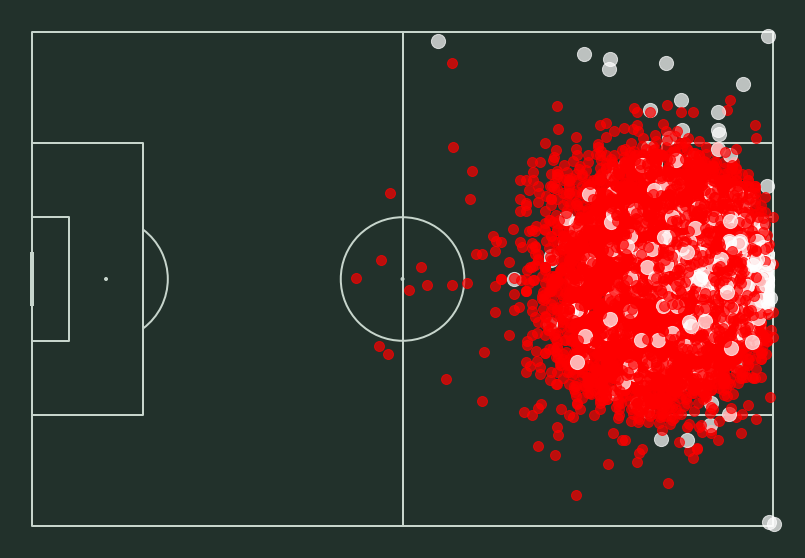

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch

fig, ax = plt.subplots(figsize=(20, 10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

"""
#The statsbomb pitch from mplsoccer
pitch = VerticalPitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, half = True)
"""
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', 
              figsize=(16, 11), constrained_layout=True, tight_layout=False)


pitch.draw(ax = ax)
plt.gca().invert_yaxis()

for x in range(len(shots_data_final['location_x'])):
    if shots_data_final['shot_outcome_name'].iloc[x] == 'Goal':
        #plt.plot((passes['x'].iloc[x],passes['end_x'].iloc[x]),(passes['y'].iloc[x],passes['end_y'].iloc[x]),color='green')
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'w', s=200, alpha = 0.7)
    else:
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'r', s=100, alpha = 0.7)
        
    

In [11]:
shots_data_final.to_excel("FAWSL.xlsx")